In [106]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.colors as mcolors
%matplotlib inline
from collections import defaultdict
import re
import pandas as pd
import unicodedata
import numpy as np

In [107]:
# Step 1: Set URL and headers to avoid being blocked
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/116.0.0.0 Safari/537.36"
}

# Step 2: Get the page and parse it
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

# Step 3: Select the correct table (Table 1)
tables = soup.find_all("table")
table_index = 1
desired_table = tables[table_index]
rows = desired_table.find_all("tr")

# Step 4: Extract headers
header_row = [cell.text.strip() for cell in rows[0].find_all("th")]

# Step 5: Extract data rows
data = []
for row in rows[1:]:
    cells = row.find_all("td")
    if not cells:
        continue
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

# Step 6: Create DataFrame
df = pd.DataFrame(data, columns=header_row)

# Step 7: Print results
print("Header:")
print(header_row, "\n")

print("First 2 rows of Data:")
for row in data[:2]:
    print(row)

# Step 8: Save to CSV
df.to_csv("prison.csv", index=False)
print("\nData saved to 'prison.csv'")


Header:
['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Details'] 

First 2 rows of Data:
['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan\nCarlos Antonio Contreras Castro', "Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on the aforementioned date, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[10] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[10] The escape is told in a book, The 10-Second J

In [108]:
# Remove the "Details" column
df = df.drop("Details", axis=1)

# To enhance readability, set the maximum column width to 30 characters.
pd.set_option('display.max_colwidth', 30)

print(df[:3])

               Date                    Prison name        Country Succeeded  \
0   August 19, 1971          Santa Martha Acatitla         Mexico       Yes   
1  October 31, 1973          Mountjoy Jail, Dublin        Ireland       Yes   
2      May 24, 1978  United States Penitentiary...  United States        No   

                      Escapee(s)  
0  Joel David Kaplan\nCarlos ...  
1  JB O'HaganSeamus TwomeyKev...  
2  Garrett Brock TrapnellMart...  


In [134]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group the data by year and count the number of escapes in each year
escapes_per_year = df.groupby('Year').size()

# Convert the index to integer for clean printing
escapes_per_year.index = escapes_per_year.index.astype(int)

# Print the result with custom header
print("Prison Escapes per Year:")
print("Year")
print(escapes_per_year.to_string())


Prison Escapes per Year:
Year
Year
1971    1
1973    1
1978    1
1981    2
1985    2
1986    3
1987    1
1988    3
1989    2
1990    1
1991    1
1992    1
1993    1
1996    1
1997    1
1999    1
2000    2
2001    3
2002    2
2003    1
2005    1
2006    1
2007    3
2009    3
2010    1
2012    1
2013    2
2014    1
2016    1
2018    1
2020    1


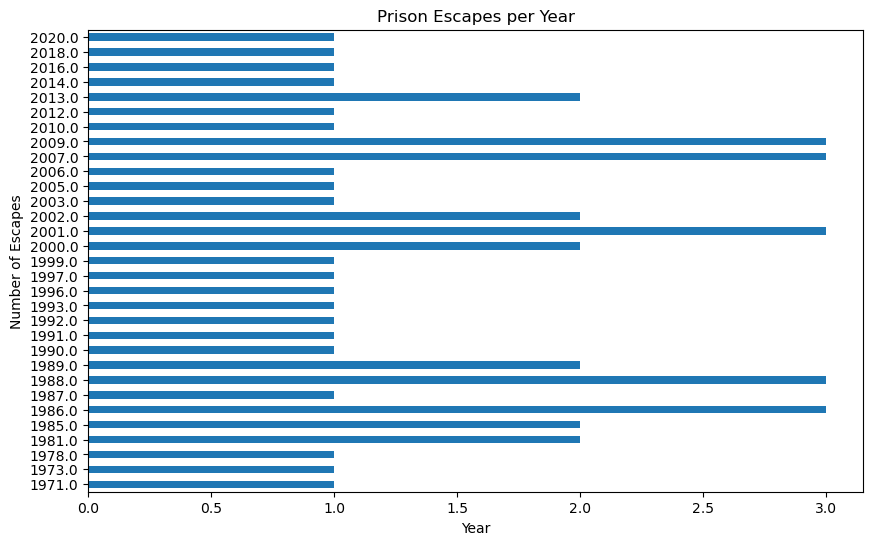

In [115]:
# Plotting the number of prison escapes per year
escapes_per_year.plot(kind='barh', figsize=(10, 6), xlabel='Year', ylabel='Number of Escapes', title='Prison Escapes per Year')
plt.show()

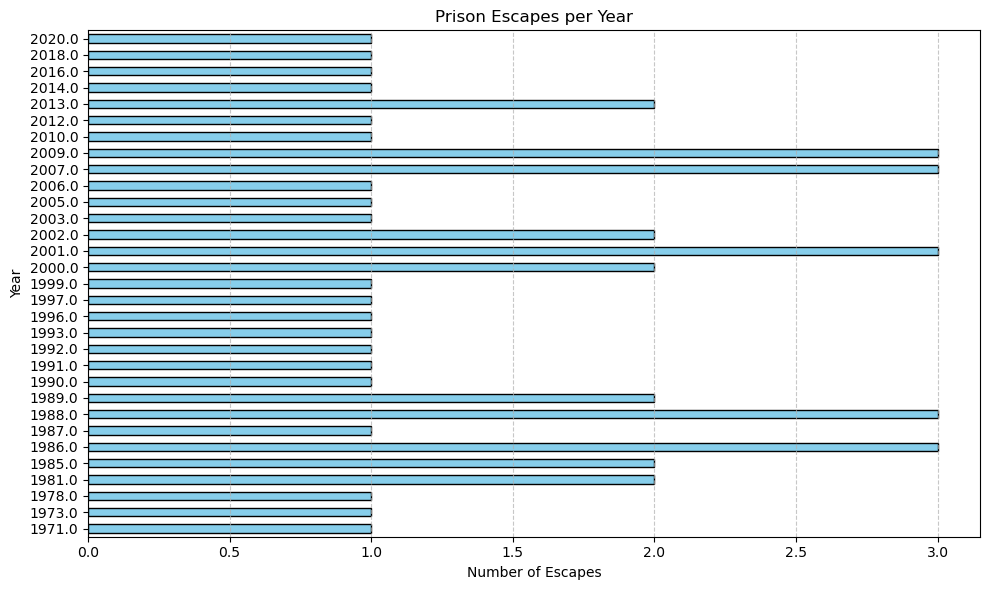

In [114]:
# # Plotting the number of prison escapes per year
# escapes_per_year.plot(
#     kind='barh',
#     figsize=(10, 6),
#     xlabel='Number of Escapes',
#     ylabel='Year',
#     title='Prison Escapes per Year',
#     color='skyblue',
#     edgecolor='black'
# )

# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()  # <-- This is crucial

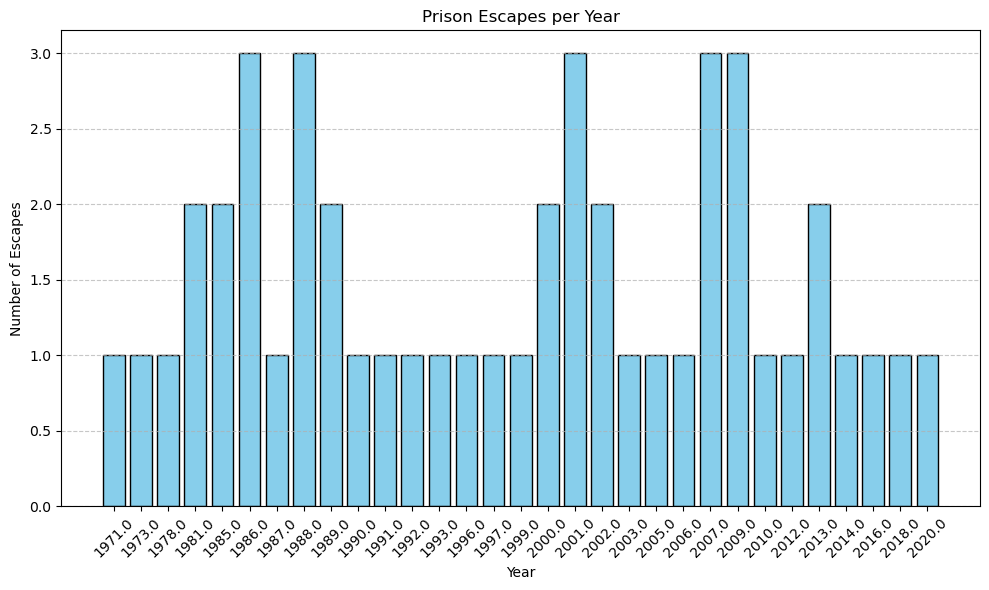

In [116]:
import matplotlib.pyplot as plt

# Reset index to turn the Series into a DataFrame with 'Year' and 'Escapes'
df_yearly = escapes_per_year.reset_index()
df_yearly.columns = ['Year', 'Number of Escapes']

# Create vertical bar chart manually
plt.figure(figsize=(10, 6))
plt.bar(df_yearly['Year'].astype(str), df_yearly['Number of Escapes'], color='skyblue', edgecolor='black')

plt.title("Prison Escapes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Escapes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


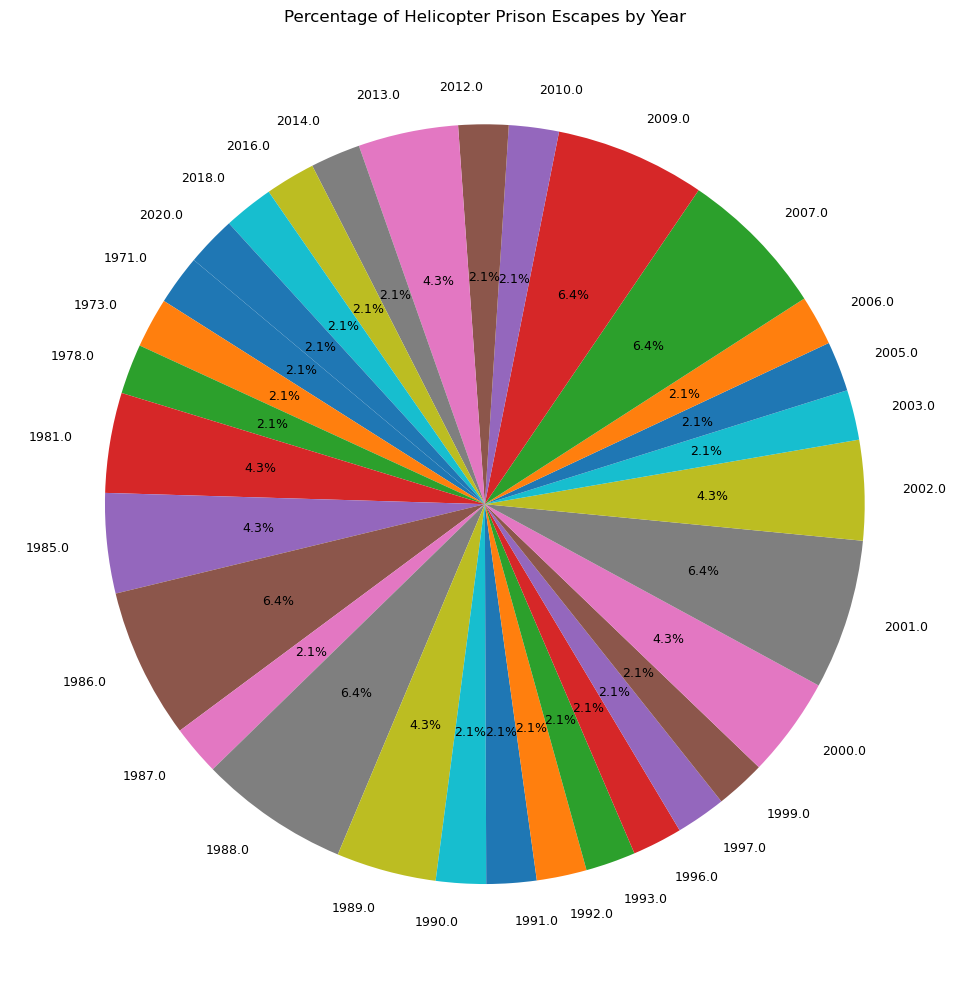

In [117]:
import matplotlib.pyplot as plt

# Convert Series to DataFrame and reset index
df_yearly = escapes_per_year.reset_index()
df_yearly.columns = ['Year', 'Number of Escapes']

# Convert Year to string for clearer pie labels
df_yearly['Year'] = df_yearly['Year'].astype(str)

# Create Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(
    df_yearly['Number of Escapes'],
    labels=df_yearly['Year'],
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 9}
)

plt.title('Percentage of Helicopter Prison Escapes by Year')
plt.tight_layout()
plt.show()


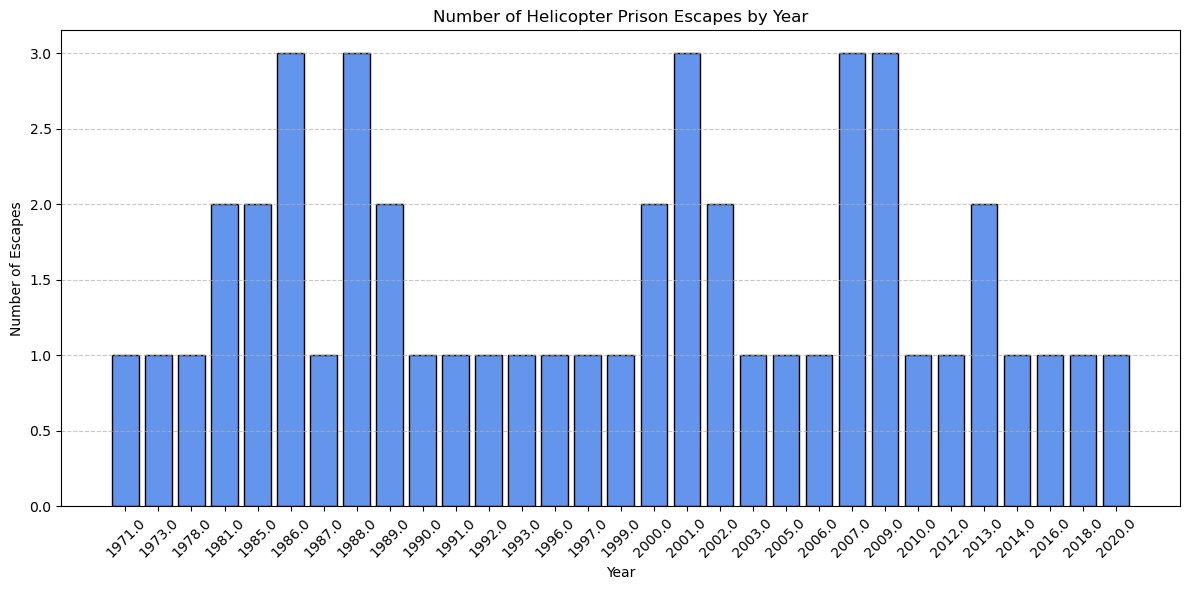

In [118]:
import matplotlib.pyplot as plt

# Reset index to get a DataFrame with 'Year' and 'Number of Escapes'
df_yearly = escapes_per_year.reset_index()
df_yearly.columns = ['Year', 'Number of Escapes']

plt.figure(figsize=(12, 6))
plt.bar(df_yearly['Year'].astype(str), df_yearly['Number of Escapes'], color='cornflowerblue', edgecolor='black')

plt.title("Number of Helicopter Prison Escapes by Year")
plt.xlabel("Year")
plt.ylabel("Number of Escapes")
plt.xticks(rotation=45)  # Rotate year labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [121]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and day of the week from the 'Date' column
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Create a dictionary to map month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Group the data by month and count the number of escapes in each month
escapes_per_month = df.groupby('Month').size()

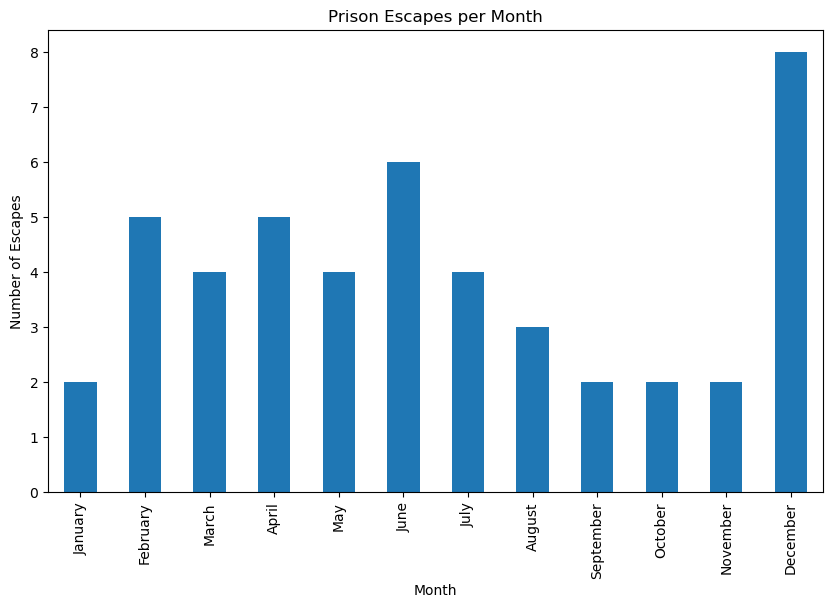

In [120]:
# Plot the number of prison escapes per month
escapes_per_month = escapes_per_month.rename(index=month_names)  # Rename month numbers to month names
escapes_per_month.plot(kind='bar', figsize=(10, 6), xlabel='Month', ylabel='Number of Escapes',
                       title='Prison Escapes per Month')


# Create a list to map day of the week numbers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by day of the week and count the number of escapes on each day
escapes_per_day = df.groupby('DayOfWeek').size()

# Show the plots
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 8))
# plt.pie(
#     escapes_per_month,
#     labels=escapes_per_month.index,
#     autopct='%1.1f%%',
#     startangle=140,
#     textprops={'fontsize': 10}
# )
# plt.title('Prison Escapes per Month')
# plt.tight_layout()
# plt.show()


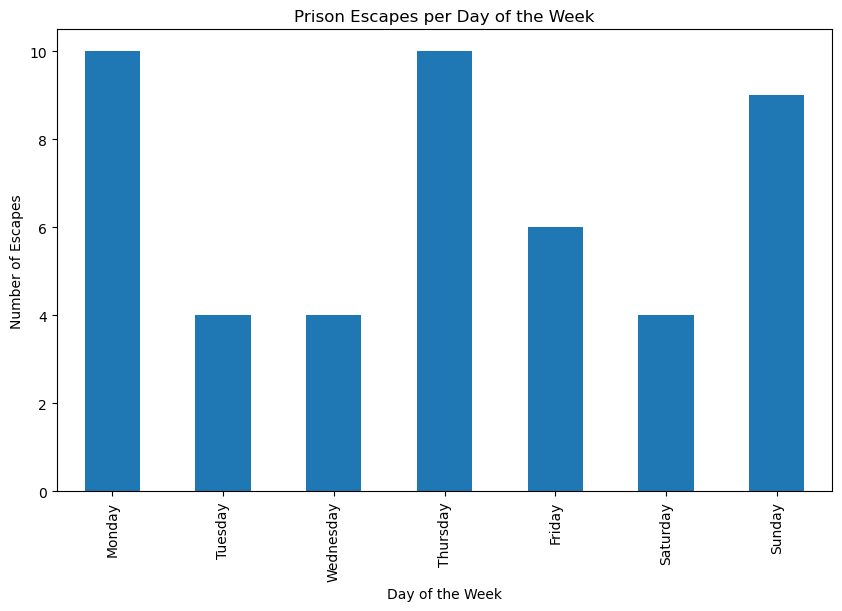

In [122]:
# Plot the number of prison escapes per day of the week
escapes_per_day.index = day_names  # Rename day of the week numbers to day names
escapes_per_day.plot(kind='bar', figsize=(10, 6), xlabel='Day of the Week', ylabel='Number of Escapes',
                     title='Prison Escapes per Day of the Week')
plt.show()


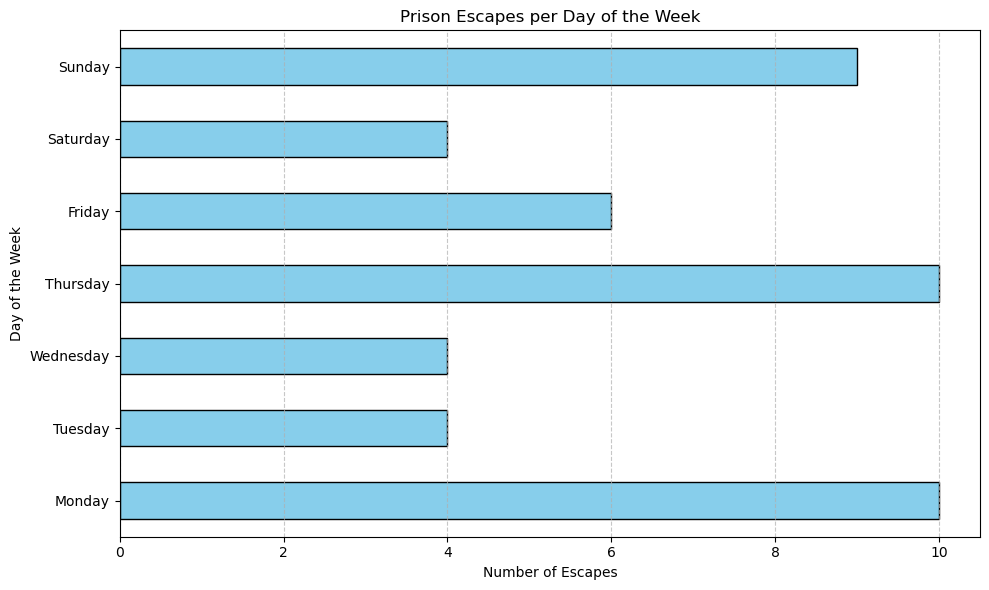

In [123]:
import matplotlib.pyplot as plt

# Rename index to day names if not already done
escapes_per_day.index = day_names

# Plot horizontal bar chart
escapes_per_day.plot(
    kind='barh',
    figsize=(10, 6),
    xlabel='Number of Escapes',
    ylabel='Day of the Week',
    title='Prison Escapes per Day of the Week',
    color='skyblue',
    edgecolor='black'
)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


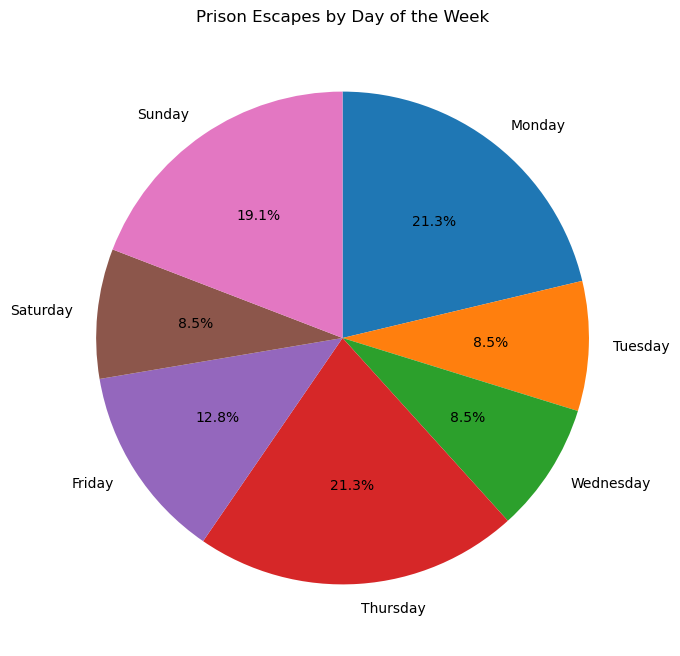

In [124]:
import matplotlib.pyplot as plt

# Just plot the pie chart directly
escapes_per_day.plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',     # Show percentages
    startangle=90,         # Start from the top
    counterclock=False,    # Clockwise slices
    title='Prison Escapes by Day of the Week'
)

plt.ylabel('')  # Hide the y-label
plt.show()


In [125]:
# Group the data by country and count the number of escapes in each country
escapes_per_country = df.groupby('Country').size()

# Sort the countries based on the number of escapes in descending order
top_countries = escapes_per_country.sort_values(ascending=False)

# Print the top countries with the highest number of recorded prison escapes
print("Countries with the Highest Number of Recorded Prison Escapes:")
print(top_countries.head(10))

Countries with the Highest Number of Recorded Prison Escapes:
Country
France            15
United States      8
Greece             4
Belgium            4
Canada             4
Brazil             2
Colombia           2
Australia          2
United Kingdom     2
Chile              1
dtype: int64


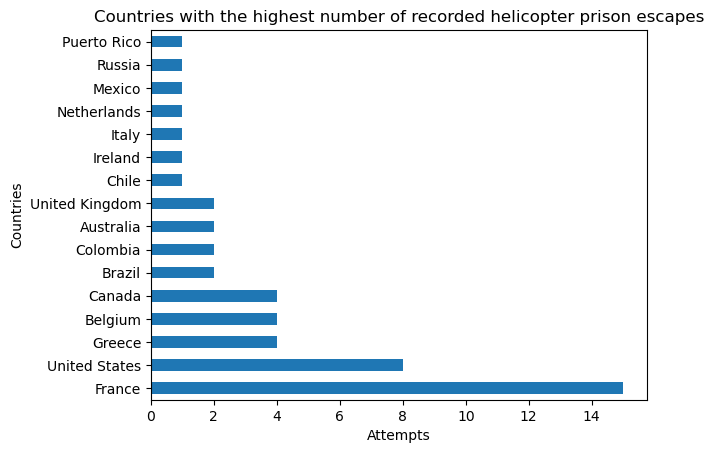

In [126]:
top_countries.plot(kind='barh')
plt.title('Countries with the highest number of recorded helicopter prison escapes')
plt.xlabel('Attempts')
plt.ylabel('Countries')
plt.show()

In [127]:
# Create a frequency table with the 'Succeeded' column
success_rate = df['Succeeded'].value_counts()['Yes']
failure_rate = df['Succeeded'].value_counts()['No']

total_rate = success_rate + failure_rate

success_percentage = success_rate * total_rate / 100
failure_percentage = failure_rate * total_rate / 100

print(f"Total: {total_rate}\nSuccess: {success_rate}\nFailure: {failure_rate} ")

Total: 50
Success: 36
Failure: 14 


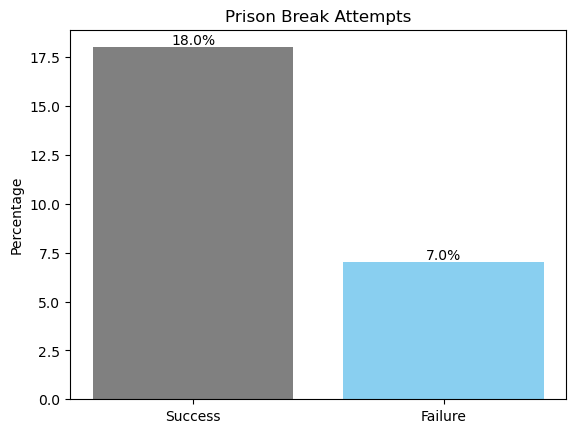

In [128]:
import matplotlib.pyplot as plt

# Assuming you have the success_percentage and failure_percentage calculated

# Create bar chart
labels = ['Success', 'Failure']
sizes = [success_percentage, failure_percentage]
colors = ['grey', '#89CFF0']

fig, ax = plt.subplots()
ax.bar(labels, sizes, color=colors)

# Add data labels to the bars
for i, v in enumerate(sizes):
    ax.text(i, v, f"{v:.1f}%", ha='center', va='bottom', color='black')

ax.set_title('Prison Break Attempts')
ax.set_ylabel('Percentage')

# Display the chart
plt.show()


In [129]:
# Calculate the average number of escapees per incident
average_escapees = df['Escapee(s)'].str.count(',') + 1
average_escapees = average_escapees.mean()

# Print the average number of escapees per incident
print("Average Number of Escapees per Incident:")
print(f"{average_escapees:.2f}")

Average Number of Escapees per Incident:
1.02


In [130]:
# Filter the DataFrame to include only rows where 'Escapee(s)' is not empty
escaped_individuals = df[df['Escapee(s)'].notnull()]

# Split the 'Escapee(s)' column to get individual escapees
individual_escapees = escaped_individuals['Escapee(s)'].str.split(',')

# Create a list to store individuals who attempted helicopter prison escapes
all_escapees = []

# Iterate over the individual_escapees list and add escapees to the all_escapees list
for escapees in individual_escapees:
    all_escapees.extend(escapees)

# Create a DataFrame to count the occurrences of each escapee
escapee_counts = pd.Series(all_escapees).value_counts()

# Filter the escapee_counts DataFrame to select escapees who attempted multiple escapes
persistent_escapees = escapee_counts[escapee_counts > 1]

# Print the persistent escapees who attempted helicopter prison escapes multiple times
print("Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:")
print(persistent_escapees)


Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:
—                 8
Michel Vaujour    2
Pascal Payet      2
Name: count, dtype: int64


In [131]:
# Set max column width for display
pd.set_option('display.max_colwidth', 30)

# Filter rows where 'Escapee(s)' is not null
temporary_df = df.dropna(subset=['Escapee(s)'], inplace=False)

# Clean escapee names string: replace newlines and semicolons with commas
cleaned_escapees = temporary_df['Escapee(s)'].str.replace('\n', ',').str.replace(';', ',')

# Extract individual names
all_escapees = []
for escapees in cleaned_escapees:
    # Split by comma, strip whitespace, exclude empty and placeholder '—'
    all_escapees.extend([name.strip() for name in escapees.split(',') if name.strip() and name.strip() != '—'])

# Count how many times each escapee appears
escapee_counts = pd.Series(all_escapees).value_counts()

# Select escapees who appear more than once
repeated_escapees = escapee_counts[escapee_counts > 1].index.tolist()

# Build regex pattern to match any repeated escapee (escaping special chars)
pattern = '|'.join([re.escape(name) for name in repeated_escapees])

# Filter rows that contain at least one of the repeated escapees
duplicated_df = temporary_df[temporary_df['Escapee(s)'].str.contains(pattern, case=False, na=False)]

# Reorder columns as you want
column_order = ['Escapee(s)', 'Succeeded', 'Prison name', 'Date', 'Country']
duplicated_df = duplicated_df.reindex(columns=column_order)

# Display the result
print("The Unstoppable: Recurrent Escapees")
print(duplicated_df.to_string(index=False))


The Unstoppable: Recurrent Escapees
    Escapee(s) Succeeded                    Prison name       Date Country
Michel Vaujour       Yes             Prison de la Santé 1986-05-26  France
Michel Vaujour        No Touraine Central Prison, Tours 1993-06-17  France
  Pascal Payet       Yes                  Luynes prison 2001-01-19  France
  Pascal Payet       Yes                  Grasse prison 2007-07-15  France
